In [1]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

/home/m/m300883/miniconda3/envs/thirdPanel/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import src.Teleconnection.pattern_statistic as sps

In [36]:
import importlib
importlib.reload(sps)

<module 'src.Teleconnection.pattern_statistic' from '/work/mh0033/m300883/3rdPanel/src/Teleconnection/pattern_statistic.py'>

In [20]:
EOF = xr.open_dataset("/work/mh0033/m300883/3rdPanel/data/changingPattern/dep_EOF.nc")

In [21]:
EOF

<xarray.Dataset>
Dimensions:  (time: 139, lon: 70, lat: 32, hlayers: 11, mode: 2)
Coordinates:
  * time     (time) object 1856-03-03 23:52:00 ... 1994-03-16 11:52:00
  * lon      (lon) float64 -90.0 -88.12 -86.25 -84.38 ... 33.75 35.62 37.5 39.38
  * lat      (lat) float64 79.27 77.41 75.54 73.68 ... 27.05 25.18 23.32 21.45
  * hlayers  (hlayers) float64 2e+04 2.5e+04 3e+04 ... 8.5e+04 9.25e+04 1e+05
  * mode     (mode) object 'NAO' 'EA'
Data variables:
    eof      (time, mode, lat, lon, hlayers) float64 ...

In [22]:
EOF = EOF.isel(time = [0,64,134])

In [23]:
EOF

<xarray.Dataset>
Dimensions:  (time: 3, lon: 70, lat: 32, hlayers: 11, mode: 2)
Coordinates:
  * time     (time) object 1856-03-03 23:52:00 ... 1990-03-16 11:52:00
  * lon      (lon) float64 -90.0 -88.12 -86.25 -84.38 ... 33.75 35.62 37.5 39.38
  * lat      (lat) float64 79.27 77.41 75.54 73.68 ... 27.05 25.18 23.32 21.45
  * hlayers  (hlayers) float64 2e+04 2.5e+04 3e+04 ... 8.5e+04 9.25e+04 1e+05
  * mode     (mode) object 'NAO' 'EA'
Data variables:
    eof      (time, mode, lat, lon, hlayers) float64 ...

In [24]:
EOF = EOF.eof

In [25]:
NAO_latHeight = sps.lat_height(EOF,mode = 'NAO')

In [37]:
EA_lonHeight = sps.lon_height(EOF,mode = 'EA')

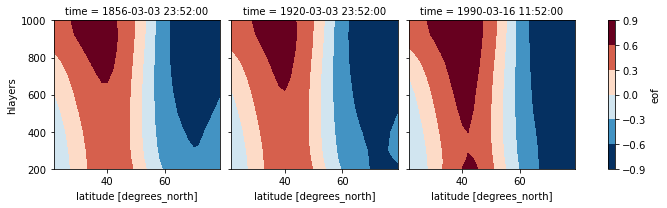

In [27]:
NAO_latHeight.plot.contourf(x = 'lat',y = 'hlayers',col = 'time')

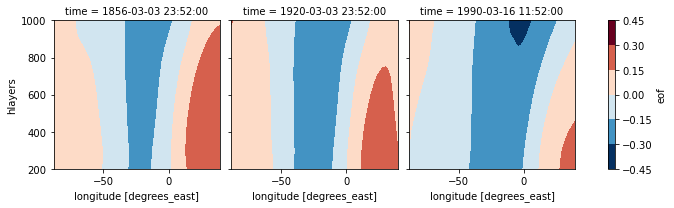

In [38]:
EA_lonHeight.plot.contourf(x = 'lon',y = 'hlayers',col = 'time')

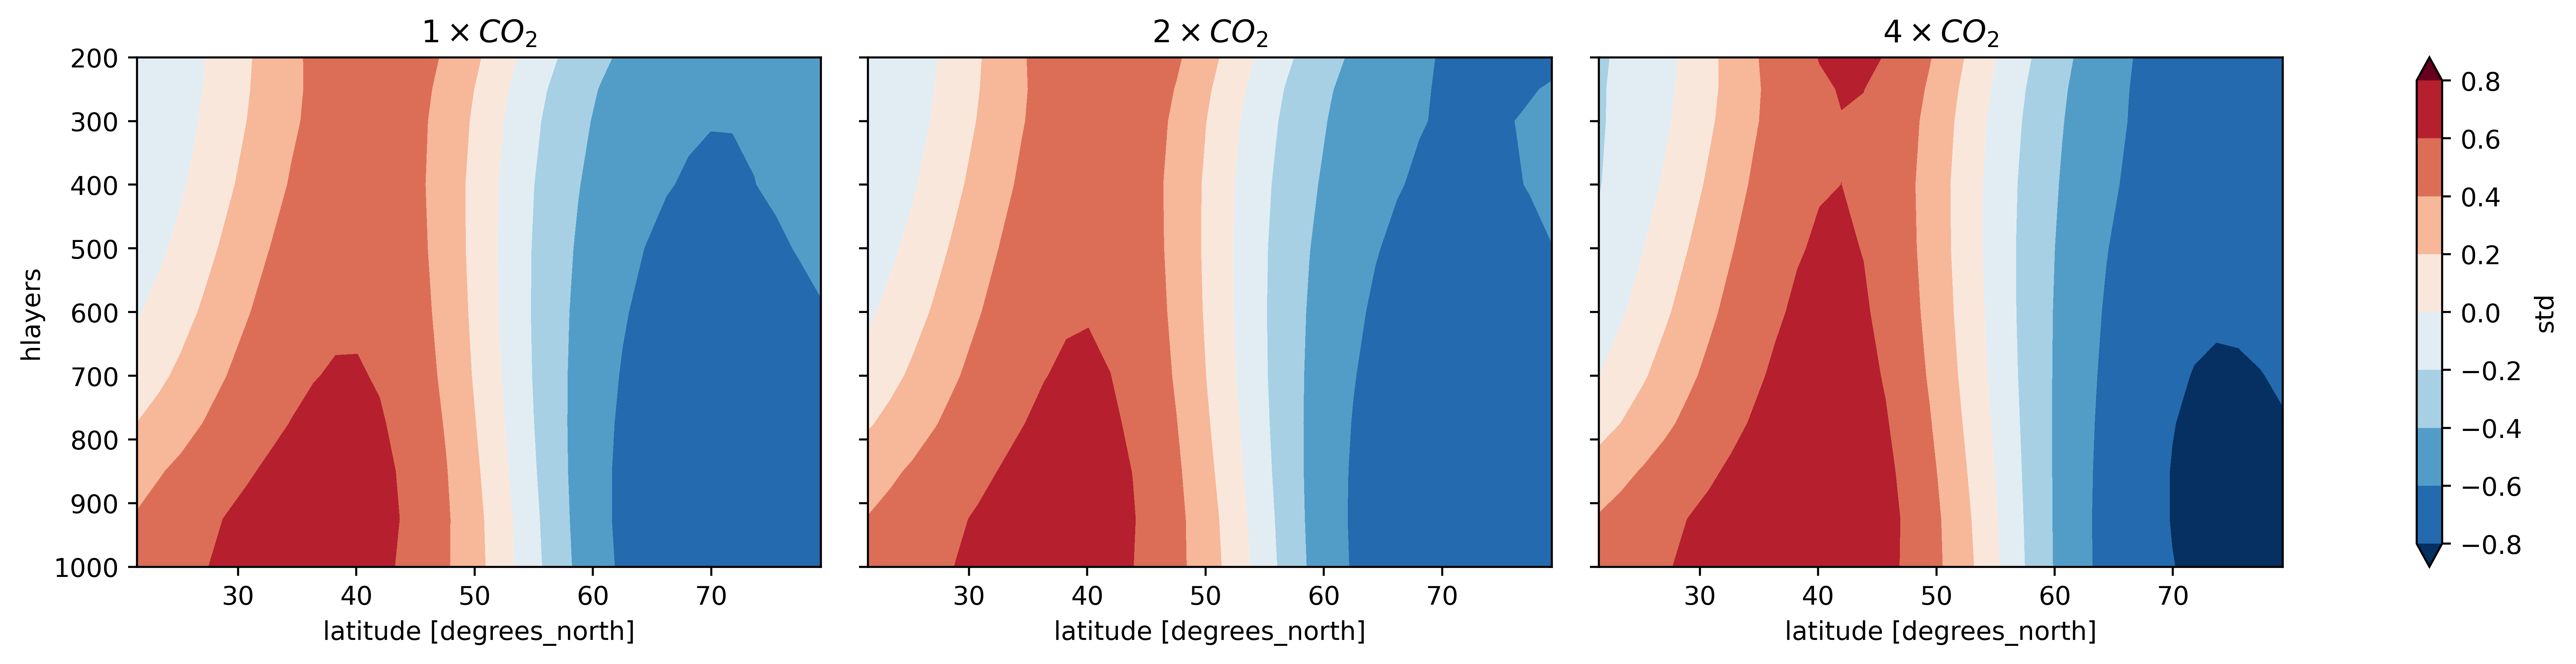

In [29]:
NAOp = NAO_latHeight.plot.contourf(x = 'lat',y = 'hlayers',col = 'time',
                            levels = np.arange(-0.8,0.81,0.2),
                            extend = 'both',
                            ylim = (1000,200),
                            add_colorbar = False)

NAOp.add_colorbar(label = 'std')
NAOp.fig.set_dpi(500)
NAOp.fig.set_figwidth(16)
NAOp.fig.set_figheight(4)
titles = [r'$1 \times CO_2$',r'$2\times CO_2$',r'$4 \times CO_2$']
for i,ax in enumerate(NAOp.axes.reshape(-1)):
    ax.set_title(titles[i])


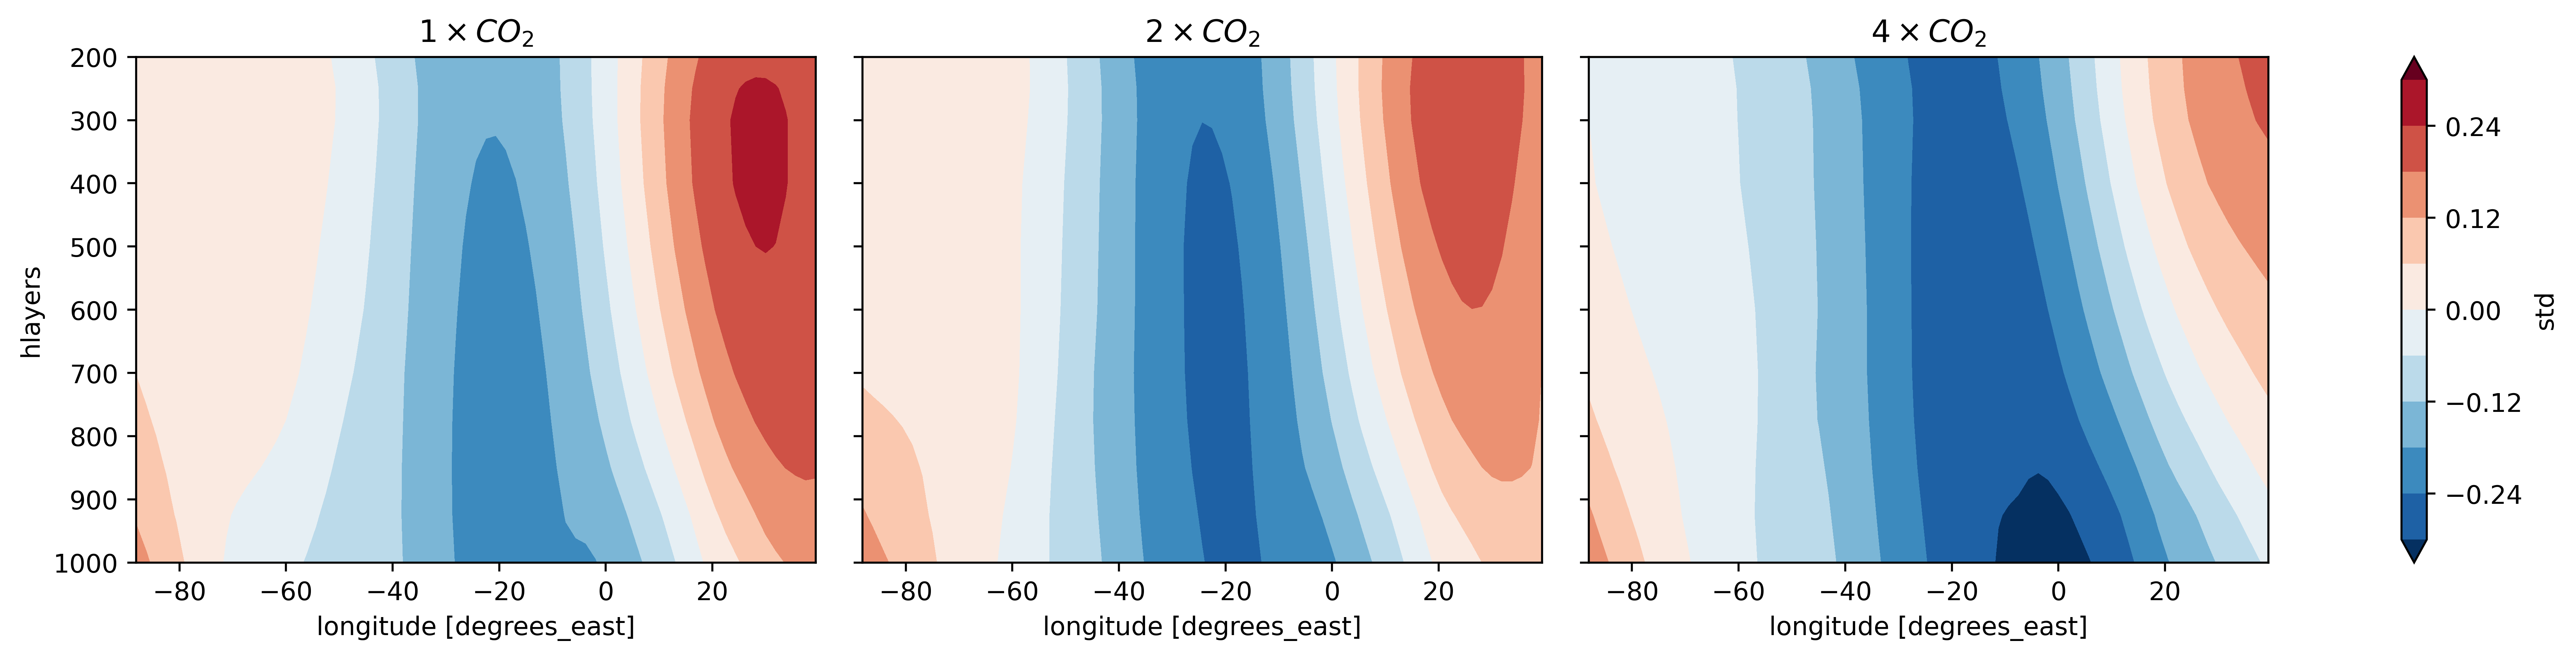

In [42]:
EAp = EA_lonHeight.plot.contourf(x = 'lon',y = 'hlayers',col = 'time',
                            levels = np.arange(-0.3,0.31,0.06),
                            extend = 'both',
                            ylim = (1000,200),
                            add_colorbar = False)

EAp.add_colorbar(label = 'std')
EAp.fig.set_dpi(500)
EAp.fig.set_figwidth(16)
EAp.fig.set_figheight(4)

titles = [r'$1 \times CO_2$',r'$2\times CO_2$',r'$4 \times CO_2$']
for i,ax in enumerate(EAp.axes.reshape(-1)):
    ax.set_title(titles[i])
